In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit_aer import *
import math
%matplotlib inline

In [3]:
simulators = [backend.name for backend in Aer.backends()]
print(simulators)


['aer_simulator', 'aer_simulator_statevector', 'aer_simulator_density_matrix', 'aer_simulator_stabilizer', 'aer_simulator_matrix_product_state', 'aer_simulator_extended_stabilizer', 'aer_simulator_unitary', 'aer_simulator_superop', 'qasm_simulator', 'statevector_simulator', 'unitary_simulator']


In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.backends import AerSimulator

def run_on_simulator(circuit):
    # Initialize simulators directly
    statevector_simulator = AerSimulator(method="statevector")
    qasm_simulator = AerSimulator()

    # Run on statevector simulator
    circuit_sv = circuit.copy()
    circuit_sv = transpile(circuit_sv, statevector_simulator)  # Transpile before execution
    statevec_job = statevector_simulator.run(circuit_sv)
    result = statevec_job.result()
    statevec = result.get_statevector()

    # Copy circuit and add measurements
    measured_circuit = circuit.copy()
    num_qubits = measured_circuit.num_qubits
    measured_circuit.measure(range(num_qubits), range(num_qubits))

    # Run on qasm simulator
    measured_circuit = transpile(measured_circuit, qasm_simulator)
    qasm_job = qasm_simulator.run(measured_circuit, shots=1024)
    counts = qasm_job.result().get_counts()

    return statevec, counts



In [31]:
circuit=QuantumCircuit(2,2)
QuantumCircuit.save_statevector(circuit)

In [33]:
statevec, counts=run_on_simulator(circuit)

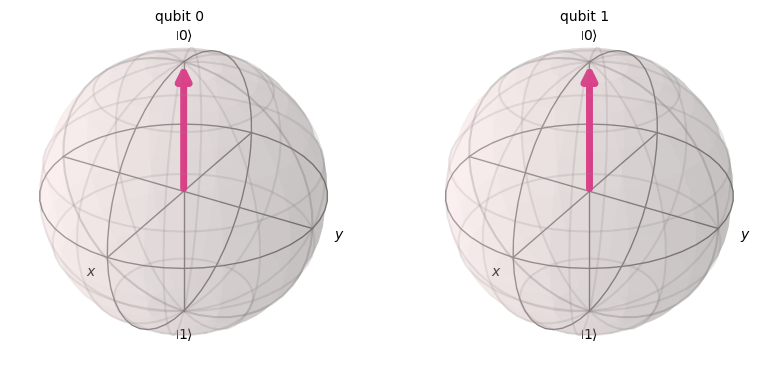

In [35]:
plot_bloch_multivector(statevec)

## Adding a Hadamard Gate to the Circuit

In [45]:
#Add a Hadamar gate to the circuit
circuit.h(0)

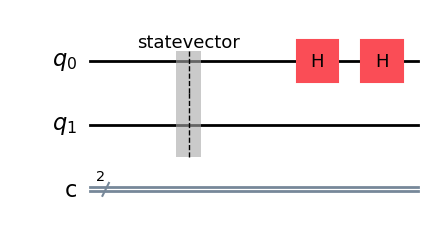

In [47]:
circuit.draw(output="mpl")

In [49]:
#Run the circuit again
statevec, counts=run_on_simulator(circuit)

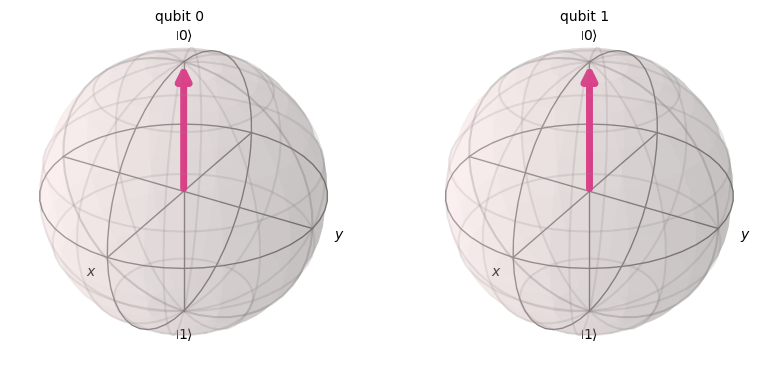

In [51]:
plot_bloch_multivector(statevec)

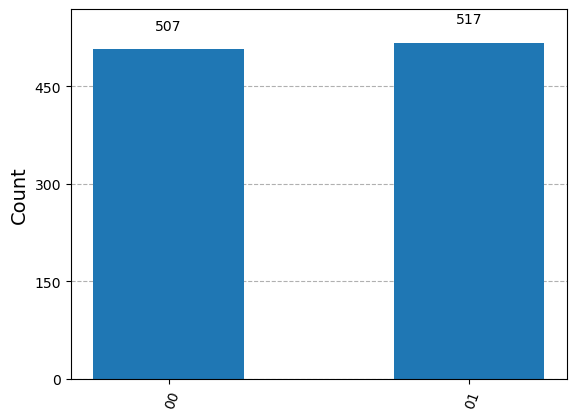

In [43]:
plot_histogram(counts)

## Starting with a new circuit of 2 Qubits adding a Hadamar and a CNOT Gate

In [65]:
circuit=QuantumCircuit(2,2)
QuantumCircuit.save_statevector(circuit)

In [67]:
#Add a Hadamar gate to the circuit and CNOT Gate
circuit.h(0)
circuit.cx(0,1)

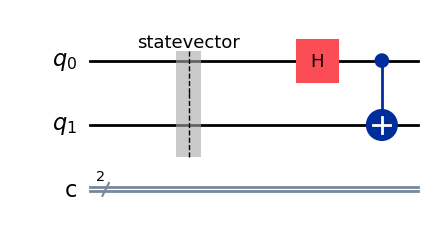

In [69]:
circuit.draw(output="mpl")

In [71]:
#Run the circuit again
statevec, counts=run_on_simulator(circuit)

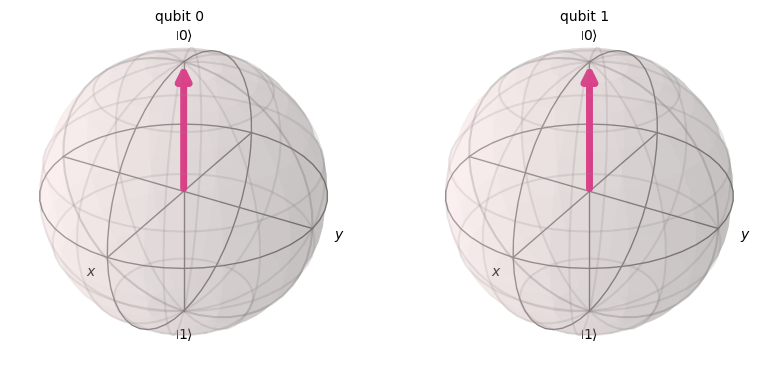

In [73]:
plot_bloch_multivector(statevec)

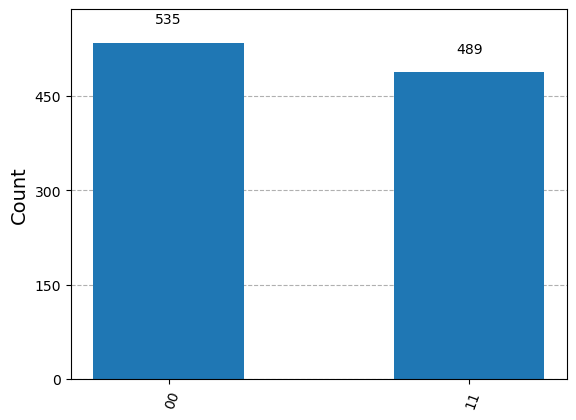

In [75]:
plot_histogram(counts)

## Creating a new Quantum Circuit with 2 Qubits and a Z gate

In [78]:
circuit=QuantumCircuit(2,2)
QuantumCircuit.save_statevector(circuit)

In [80]:
#Add a Rotation
circuit.rx(math.pi/4,0)
circuit.rx(math.pi/2,1)


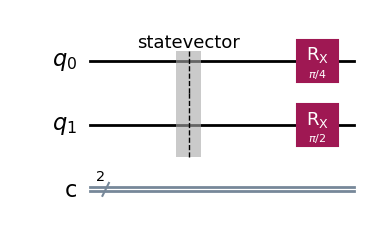

In [82]:
circuit.draw(output="mpl")

In [84]:
#Run the circuit again
statevec, counts=run_on_simulator(circuit)

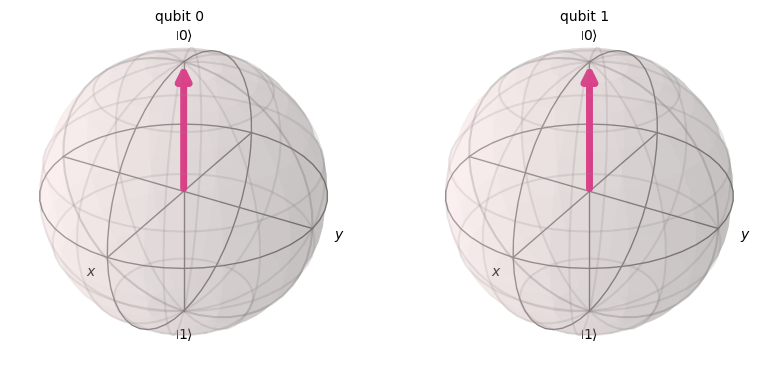

In [86]:
plot_bloch_multivector(statevec)

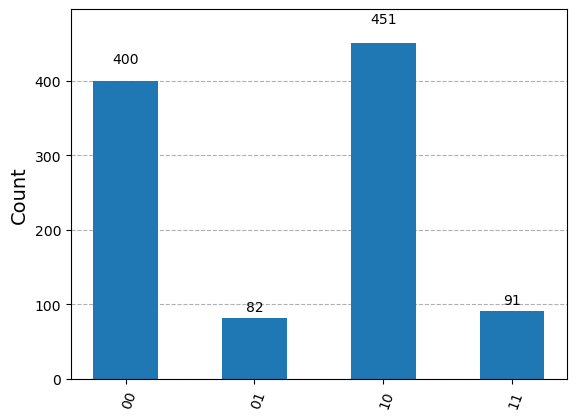

In [88]:
plot_histogram(counts)

## Create a new circuit with 1 Qubit and add a Hadamar Gate

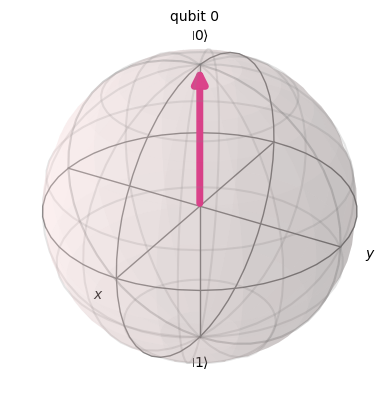

In [95]:
circuit=QuantumCircuit(1,1)
QuantumCircuit.save_statevector(circuit)
circuit.h(0)
statevec, counts=run_on_simulator(circuit)
plot_bloch_multivector(statevec)



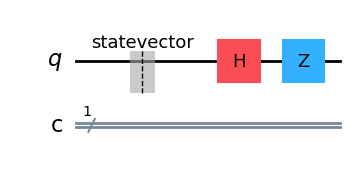

In [104]:
circuit.draw(output='mpl')

In [ ]:
plot_histogram(counts)

## Create a new Quantum Circuit with 1 Qubit and add a Hadamar and a Z gate

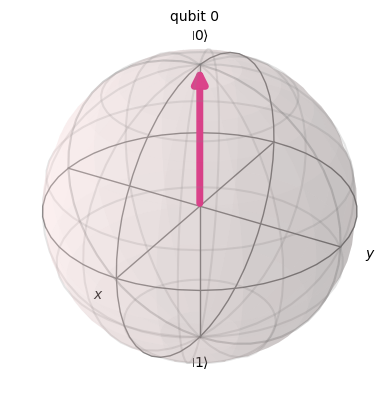

In [100]:
circuit=QuantumCircuit(1,1)
QuantumCircuit.save_statevector(circuit)
circuit.h(0)
circuit.z(0)
statevec, counts=run_on_simulator(circuit)
plot_bloch_multivector(statevec)


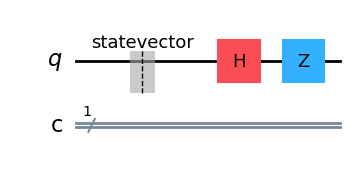

In [102]:
circuit.draw(output='mpl')

C:\Users\rolan\anaconda3\Lib\site-packages\qiskit\visualization\counts_visualization.py:306: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


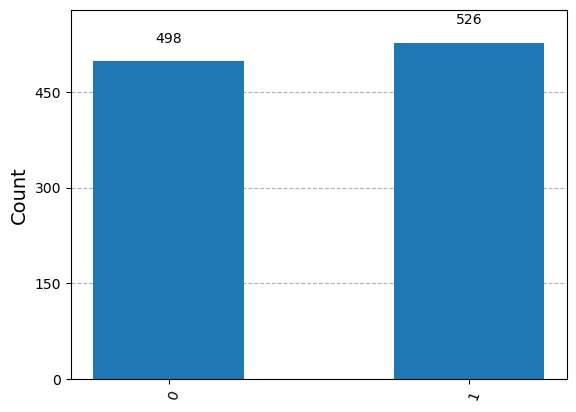

In [106]:
plot_histogram(counts)